In [2]:
import numpy as np
import os
import cv2
from model_utils_sw import MaskToBinary2D

def DiceCoefficient(gt, pred):
    # https://stackoverflow.com/questions/31273652/how-to-calculate-dice-coefficient-for-measuring-accuracy-of-image-segmentation-i
    gt=MaskToBinary2D(gt)
    pred = MaskToBinary2D(pred)
    k = 1
    dice = np.sum(pred[gt == k] == k) * 2.0 / (np.sum(pred[pred == k] == k) + np.sum(gt[gt == k] == k))
    return dice

sample_dir='../'
phases=['train_gen_256', 'train_masks_256']

# gen_image=os.listdir(os.path.join(sample_dir, phases[0]))
# label_image=os.listdir(os.path.join(sample_dir, phases[1]))
subjects=os.listdir(os.path.join(sample_dir, phases[0]))

def chk_no_mask_3d(array):
    x,y,z=np.where(array!=0)
    if len(x)*len(y)*len(z) == 0:
        return True
    else:
        return False
    
NO_MASK_ONE=True

whole_dice_IDHwt=[]
for subject in subjects:
    k=0
    dice_sum=0
    
    gen_image=os.listdir(os.path.join(sample_dir, phases[0], subject))
    label_image=os.listdir(os.path.join(sample_dir, phases[1], subject))
    
    for gen, label in zip(gen_image, label_image):
        gen_im=cv2.imread(os.path.join(sample_dir, phases[0], subject, gen))
        label_im=cv2.imread(os.path.join(sample_dir, phases[1], subject, label))

        if chk_no_mask_3d(label_im) and chk_no_mask_3d(gen_im):
            if NO_MASK_ONE:
                k+=1
                dice_sum+=1
            else:
                continue
        else:
            k+=1
#             print(label, DiceCoefficient(label_im[:,:,0], gen_im[:,:,0]))
            dice_sum+=DiceCoefficient(label_im[:,:,0], gen_im[:,:,0])
        
    print('{} | average dice score -- {:4f}'.format(subject, float(dice_sum) / k))
    whole_dice_IDHwt.append(float(dice_sum) / k)
print('whole average dice score -- {:4f}'.format(np.mean(whole_dice_IDHwt)))

1371892 | average dice score -- 0.696805
2034571 | average dice score -- 0.732327
2174093 | average dice score -- 0.808651
2479047 | average dice score -- 0.689063
2530541 | average dice score -- 0.723784
2545167 | average dice score -- 0.785700
2561276 | average dice score -- 0.804911
2595099 | average dice score -- 0.717565
2602057 | average dice score -- 0.736923
2659261 | average dice score -- 0.883483
2917442 | average dice score -- 0.817879
3263248 | average dice score -- 0.572010
3692092 | average dice score -- 0.627361
3893850 | average dice score -- 0.658199
3938641 | average dice score -- 0.761125
4331755 | average dice score -- 0.876966
4334564 | average dice score -- 0.892184
4413737 | average dice score -- 0.737794
5111647 | average dice score -- 0.807693
5166832 | average dice score -- 0.604470
5184971 | average dice score -- 0.632269
5199303 | average dice score -- 0.795735
5208895 | average dice score -- 0.649526
5222508 | average dice score -- 0.640597
5233369 | averag

In [3]:
# Test on TCGA external dataset

sample_dir='../segmentation_testset/'
phases=['TCGA_gen_256', 'TCGA_mask_256']

subjects=os.listdir(os.path.join(sample_dir, phases[0]))

def chk_no_mask_3d(array):
    x,y,z=np.where(array!=0)
    if len(x)*len(y)*len(z) == 0:
        return True
    else:
        return False

whole_dice_TCGA=[]
for subject in subjects:
    k=0
    dice_sum=0
    
    gen_image=os.listdir(os.path.join(sample_dir, phases[0], subject))
    label_image=os.listdir(os.path.join(sample_dir, phases[1], subject))
    
    for gen, label in zip(gen_image, label_image):
        gen_im=cv2.imread(os.path.join(sample_dir, phases[0], subject, gen))
        label_im=cv2.imread(os.path.join(sample_dir, phases[1], subject, label))

        if chk_no_mask_3d(label_im) and chk_no_mask_3d(gen_im):
            if NO_MASK_ONE:
                k+=1
                dice_sum+=1
            else:
                continue
        else:
            k+=1
#             print(label, DiceCoefficient(label_im[:,:,0], gen_im[:,:,0]))
            dice_sum+=DiceCoefficient(label_im[:,:,0], gen_im[:,:,0])
        
    print('{} | average dice score -- {:4f}'.format(subject, float(dice_sum) / k))
    whole_dice_TCGA.append(float(dice_sum) / k)
    
print('whole average dice score -- {:4f}'.format(np.mean(whole_dice_TCGA)))

CS_5395 | average dice score -- 0.522148
CS_5397 | average dice score -- 0.659790
CS_6186 | average dice score -- 0.546957
CS_6188 | average dice score -- 0.352360
CS_6669 | average dice score -- 0.626022
DU_5852 | average dice score -- 0.661321
DU_7014 | average dice score -- 0.565678
DU_8158 | average dice score -- 0.636458
DU_8162 | average dice score -- 0.604932
DU_8165 | average dice score -- 0.516821
DU_A5TT | average dice score -- 0.661770
FG_5963 | average dice score -- 0.435519
FG_6692 | average dice score -- 0.504834
FG_7643 | average dice score -- 0.721294
FG_A4MU | average dice score -- 0.483527
HT_7469 | average dice score -- 0.577477
HT_7680 | average dice score -- 0.533081
HT_7854 | average dice score -- 0.500171
HT_7860 | average dice score -- 0.792266
HT_7882 | average dice score -- 0.842377
HT_8015 | average dice score -- 0.669103
HT_8019 | average dice score -- 0.347586
HT_8107 | average dice score -- 0.868625
HT_8110 | average dice score -- 0.663886
HT_8558 | averag

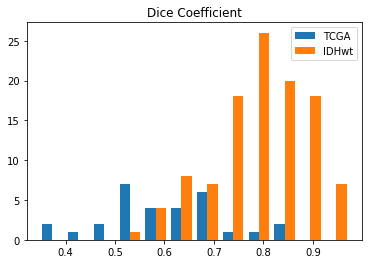

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.title('Dice Coefficient')
plt.hist([whole_dice_TCGA,whole_dice_IDHwt], bins=12)
plt.legend(['TCGA', 'IDHwt'])
plt.savefig('./result_stats_img/histogram_dice.png')

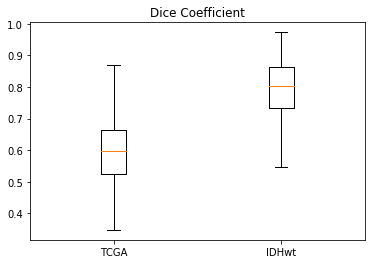

In [26]:
plt.title('Dice Coefficient')
plt.boxplot([whole_dice_TCGA,whole_dice_IDHwt], labels=['TCGA', 'IDHwt'])
plt.savefig('./result_stats_img/boxplot_dice.png')